## Pymaceuticals Inc.

- Based on the box plot that shows the distrubution of the tumor volume for each treatment group,Capomulin and Ramicane seem to be more effective in reducing the volume of tumors in mice in the trials, compared to Infubinol and Ceftamin regimen.

- Given the scatter plot and the regression line for the mouse weight and average tumor volume for Capomulin, it is likely that tumor volumes are larger for the heavier mice.
 

In [1]:
# import modules
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# read-in two datafiles to be merged from the Data folder
mouse = pd.read_csv("data/Mouse_metadata.csv")
result = pd.read_csv("data/Study_results.csv")

# check the each dataframe; find the col that can be used to merge the two dfs --> "Mouse ID"
# mouse.head()
# result.head()
# mouse.info() --> no missing values; n=249
# result.info() --> no missing values; n=1893

In [2]:
# merging two dfs & display the data table for preview
df = pd.merge(result,mouse, on="Mouse ID")
df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [3]:
# Checking the number of mice.
num_mice = df["Mouse ID"].nunique()
print(num_mice)

249


In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

# change the data type of the Timepoint col & merge the two cols(Mouse ID and Timepoint) to create a unique ID
df.Timepoint=df.Timepoint.astype(str)
df["UniqID"]=df[["Mouse ID","Timepoint"]].agg(''.join, axis=1)

# find all the duplicates in the UniqID col & identify the duplicate mice by ID number
dup=df[df.duplicated(subset=["UniqID"],keep=False)]
dup_mouseID = dup["Mouse ID"].unique()
dup_mouseID

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
dup

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),UniqID
860,g989,0,45.000000,0,Propriva,Female,21,26,g9890
861,g989,0,45.000000,0,Propriva,Female,21,26,g9890
862,g989,5,48.786801,0,Propriva,Female,21,26,g9895
863,g989,5,47.570392,0,Propriva,Female,21,26,g9895
864,g989,10,51.745156,0,Propriva,Female,21,26,g98910
865,g989,10,49.880528,0,Propriva,Female,21,26,g98910
866,g989,15,51.325852,1,Propriva,Female,21,26,g98915
867,g989,15,53.442020,0,Propriva,Female,21,26,g98915
868,g989,20,55.326122,1,Propriva,Female,21,26,g98920
869,g989,20,54.657650,1,Propriva,Female,21,26,g98920


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
dup_mouseID_val = dup["Mouse ID"].unique()[0]
mask=df["Mouse ID"]==dup_mouseID_val
cleaned = df[~mask]

In [7]:
# Checking the number of mice in the clean DataFrame.
cleaned["Mouse ID"].nunique()

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

vmean=cleaned.groupby(cleaned["Drug Regimen"])["Tumor Volume (mm3)"].mean()
vmedian=cleaned.groupby(cleaned["Drug Regimen"])["Tumor Volume (mm3)"].median()
vvar=cleaned.groupby(cleaned["Drug Regimen"])["Tumor Volume (mm3)"].var()
vsd=cleaned.groupby(cleaned["Drug Regimen"])["Tumor Volume (mm3)"].std()
vsem=cleaned.groupby(cleaned["Drug Regimen"])["Tumor Volume (mm3)"].sem()

TVsummary = pd.DataFrame({
    "tumor volume mean": vmean,
    "tumor volume median": vmedian,
    "tumor volume variance": vvar,
    "tumor volume standard deviation": vsd,
    "tumor volume standard error": vsem,
    
})

TVsummary

,tumor volume mean,tumor volume median,tumor volume variance,tumor volume standard deviation,tumor volume standard error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
TVsummary2 =  cleaned.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
TVsummary2 

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

AxesSubplot(0.125,0.11;0.775x0.77)


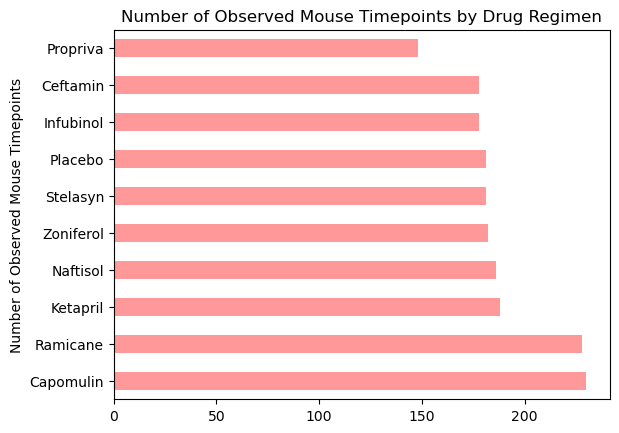

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
barp=cleaned['Drug Regimen'].value_counts().plot(kind='barh', 
                                            title="Number of Observed Mouse Timepoints by Drug Regimen",
                                            xlabel="Number of Observed Mouse Timepoints",
                                            ylabel="Drug Regimen",
                                            fontsize =10,
                                            color="red",
                                            alpha=0.4
                                           )
print(barp)

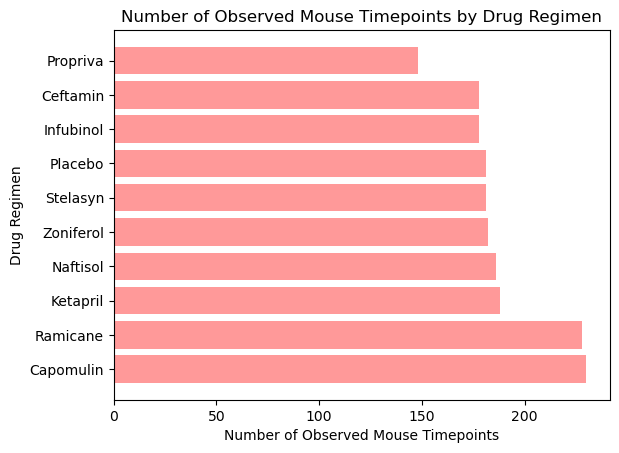

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x=cleaned["Drug Regimen"].value_counts().index
y=cleaned["Drug Regimen"].value_counts().values

plt.barh(x,y,color="red",alpha=0.4)
plt.title("Number of Observed Mouse Timepoints by Drug Regimen")
plt.xlabel("Number of Observed Mouse Timepoints")
plt.ylabel("Drug Regimen")
plt.show()

AxesSubplot(0.22375,0.11;0.5775x0.77)


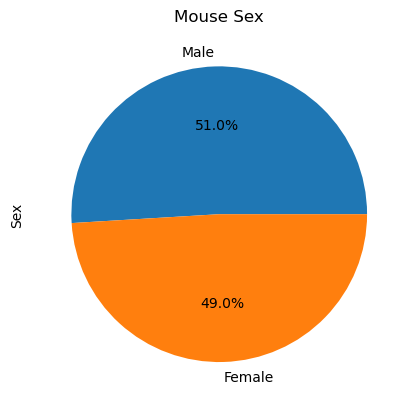

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
pie1=cleaned.Sex.value_counts().plot(kind="pie", title="Mouse Sex", autopct="%1.1f%%")
print(pie1)

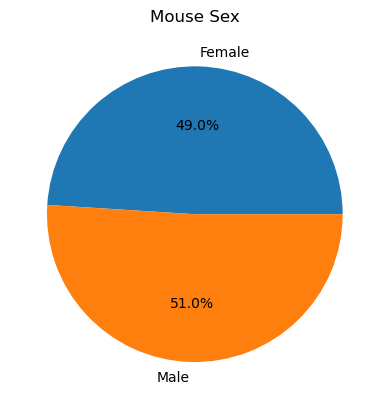

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels=["Female","Male"]
values=[49.0,51.0]
plt.pie(values,labels=labels, autopct="%1.1f%%")
plt.title("Mouse Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

##--to get the final tumor volume of each mouse across four regimens:


# susbet the relevant cols (Mouse ID, Timepoint, Tumor Volume (mm3), Drug Regimen)
finalTV = cleaned[["Mouse ID","Timepoint","Tumor Volume (mm3)","Drug Regimen"]]

# sort the df by "Mouse ID" and "Timepoint"
finalTV.Timepoint = finalTV.Timepoint.astype(int) # to be able to use sort_values()
sortedFinalTV = finalTV.sort_values(by=["Mouse ID","Timepoint"],ascending=False)

# Get the last timepoint data by using drop_duplicates
lastTpOnly = sortedFinalTV.drop_duplicates(subset="Mouse ID")

# create 4 dfs based on the Drug Regimen groups (Capomulin, Ramicane, Infubinol, and Ceftamin)
cap = lastTpOnly[lastTpOnly["Drug Regimen"]=="Capomulin"]
ram = lastTpOnly[lastTpOnly["Drug Regimen"]=="Ramicane"]
inf = lastTpOnly[lastTpOnly["Drug Regimen"]=="Infubinol"]
cef = lastTpOnly[lastTpOnly["Drug Regimen"]=="Ceftamin"]

cap.head(3)
#ram.head(3)
#inf.head(3)
#cef.head(3)

/var/folders/cd/rg2nggh16mj3s3f1rltt1h8h0000gn/T/ipykernel_27089/2866530484.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  finalTV.Timepoint = finalTV.Timepoint.astype(int) # to be able to use sort_values()


,Mouse ID,Timepoint,Tumor Volume (mm3),Drug Regimen
1814,y793,45,31.896238,Capomulin
1720,x401,45,28.484033,Capomulin
1784,w914,45,36.041047,Capomulin


In [64]:
# Put treatments into a list for for loop (and later for plot labels)
tretment = ["Capomulin", "Ramicane", "Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
#tumor_vol =[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset 
# Determine outliers using upper and lower bounds

# Subset only TV cols 
capTV=cap["Tumor Volume (mm3)"]
ramTV=ram["Tumor Volume (mm3)"]
infTV=inf["Tumor Volume (mm3)"]
cefTV=cef["Tumor Volume (mm3)"]

type(capTV)

pandas.core.series.Series

In [49]:
# get IQRs, Lower and Upper quantiles for 4 types of regimen

## Capomulin
q=capTV.quantile([0.25,0.5,0.75])
cap_lowerq = q[0.25]
cap_upperq = q[0.75]
cap_iqr = cap_upperq-cap_lowerq

cap_lowerb = cap_lowerq - (1.5*cap_iqr)
cap_upperb = cap_upperq + (1.5*cap_iqr)

print(f"The lower quartile of the final tumor volumes for Capomulin is: {round(cap_lowerq,2)}")
print(f"The upper quartile of the final tumor volumes for Capomulin is: {round(cap_upperq,2)}")
print(f"The interquartile range of the final tumor volumes for Capomulin is: {round(cap_iqr,2)}")
print(f"the final tumor volumes values that are below {round(cap_lowerb,2)} could be outliers.")
print(f"the final tumor volumes values that are above {round(cap_upperb,2)} could be outliers.")
print("------------------------------------------------------------------------------------------")

## Ramicane
q=ramTV.quantile([0.25,0.5,0.75])
ram_lowerq = q[0.25]
ram_upperq = q[0.75]
ram_iqr = ram_upperq-ram_lowerq

ram_lowerb = ram_lowerq - (1.5*ram_iqr)
ram_upperb = ram_upperq + (1.5*ram_iqr)

print(f"The lower quartile of the final tumor volumes for Capomulin is: {round(ram_lowerq,2)}")
print(f"The upper quartile of the final tumor volumes for Capomulin is: {round(ram_upperq,2)}")
print(f"The interquartile range of the final tumor volumes for Capomulin is: {round(ram_iqr,2)}")
print(f"the final tumor volumes values that are below {round(ram_lowerb,2)} could be outliers.")
print(f"the final tumor volumes values that are above {round(ram_upperb,2)} could be outliers.")
print("------------------------------------------------------------------------------------------")

## Infubinol
q=infTV.quantile([0.25,0.5,0.75])
inf_lowerq = q[0.25]
inf_upperq = q[0.75]
inf_iqr = inf_upperq-inf_lowerq

inf_lowerb = inf_lowerq - (1.5*inf_iqr)
inf_upperb = inf_upperq + (1.5*inf_iqr)

print(f"The lower quartile of the final tumor volumes for Capomulin is: {round(inf_lowerq,2)}")
print(f"The upper quartile of the final tumor volumes for Capomulin is: {round(inf_upperq,2)}")
print(f"The interquartile range of the final tumor volumes for Capomulin is: {round(inf_iqr,2)}")
print(f"the final tumor volumes values that are below {round(inf_lowerb,2)} could be outliers.")
print(f"the final tumor volumes values that are above {round(inf_upperb,2)} could be outliers.")
print("------------------------------------------------------------------------------------------")

## Ceftamin
q=cefTV.quantile([0.25,0.5,0.75])
cef_lowerq = q[0.25]
cef_upperq = q[0.75]
cef_iqr = cef_upperq-cef_lowerq

cef_lowerb = cef_lowerq - (1.5*cef_iqr)
cef_upperb = cef_upperq + (1.5*cef_iqr)

print(f"The lower quartile of the final tumor volumes for Capomulin is: {round(cef_lowerq,2)}")
print(f"The upper quartile of the final tumor volumes for Capomulin is: {round(cef_upperq,2)}")
print(f"The interquartile range of the final tumor volumes for Capomulin is: {round(cef_iqr,2)}")
print(f"the final tumor volumes values that are below {round(cef_lowerb,2)} could be outliers.")
print(f"the final tumor volumes values that are above {round(cef_upperb,2)} could be outliers.")

The lower quartile of the final tumor volumes for Capomulin is: 32.38
The upper quartile of the final tumor volumes for Capomulin is: 40.16
The interquartile range of the final tumor volumes for Capomulin is: 7.78
the final tumor volumes values that are below 20.7 could be outliers.
the final tumor volumes values that are above 51.83 could be outliers.
------------------------------------------------------------------------------------------
The lower quartile of the final tumor volumes for Capomulin is: 31.56
The upper quartile of the final tumor volumes for Capomulin is: 40.66
The interquartile range of the final tumor volumes for Capomulin is: 9.1
the final tumor volumes values that are below 17.91 could be outliers.
the final tumor volumes values that are above 54.31 could be outliers.
------------------------------------------------------------------------------------------
The lower quartile of the final tumor volumes for Capomulin is: 54.05
The upper quartile of the final tumor 

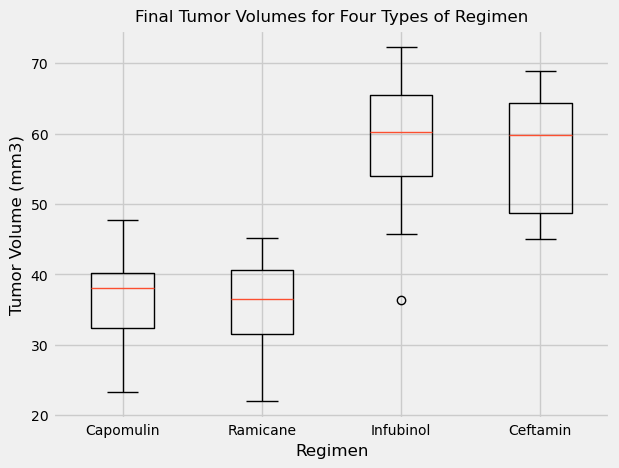

In [76]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

df=[capTV,ramTV,infTV,cefTV]
plt.style.use('fivethirtyeight')
plt.boxplot(df,labels=tretment)
plt.title("Final Tumor Volumes for Four Types of Regimen", fontsize=12)
plt.xlabel("Regimen", fontsize=12)
plt.ylabel("Tumor Volume (mm3)", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

## Line and Scatter Plots

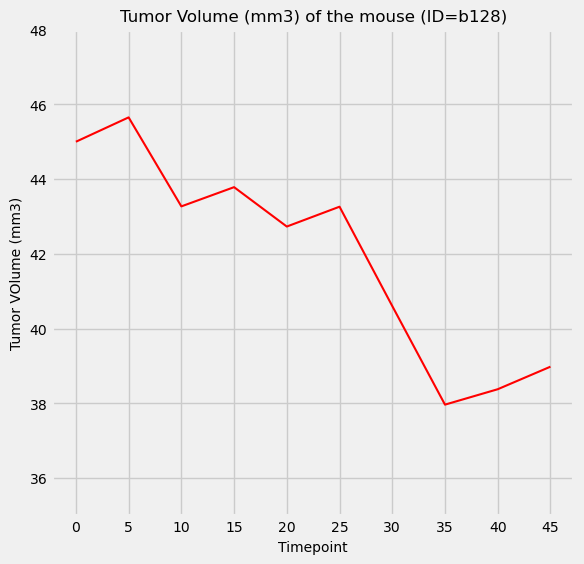

In [140]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
plt.figure(figsize=(6,6))
singleDF=cleaned.loc[cleaned["Mouse ID"]=="b128",:]
singleDF
plt.plot(singleDF.Timepoint,singleDF["Tumor Volume (mm3)"], linewidth=1.5, color="red")
plt.title("Tumor Volume (mm3) of the mouse (ID=b128)", fontsize=12)
plt.ylabel("Tumor VOlume (mm3)", fontsize=10)
plt.xlabel("Timepoint", fontsize=10)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.ylim(35,48)
plt.show()

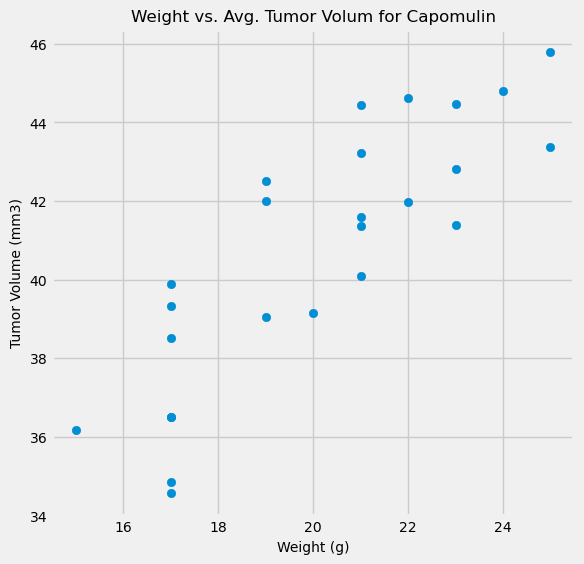

In [139]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
cleaned.head()
c=cleaned.loc[cleaned["Drug Regimen"]=="Capomulin",:]
c_new=c.groupby(['Mouse ID']).mean()
c_new

plt.figure(figsize=(6,6))
plt.scatter(c_new["Weight (g)"],c_new["Tumor Volume (mm3)"])
plt.title("Weight vs. Avg. Tumor Volum for Capomulin", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Weight (g)", fontsize=10)
plt.ylabel("Tumor Volume (mm3)", fontsize=10)
plt.show()

## Correlation and Regression

In [146]:
# Calculate the correlation coefficient 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
cor=st.pearsonr(c_new["Weight (g)"],c_new["Tumor Volume (mm3)"])
round(cor[0],2)

0.84

The linear regression model that fits the mouse weight and avg tumor volume for Capomulin is y=21.55 + 0.95*weight


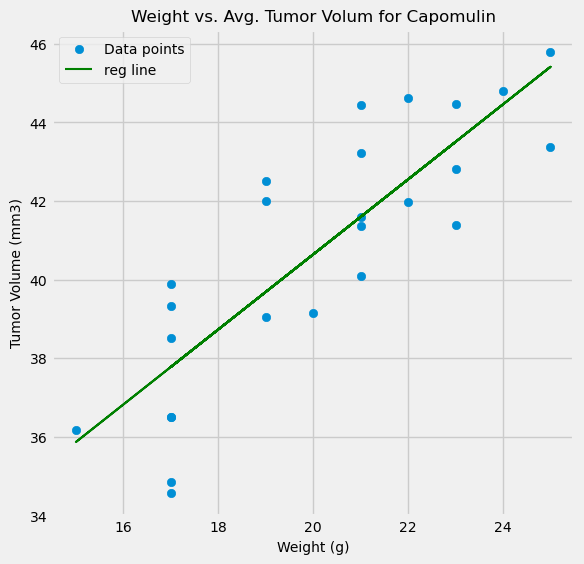

In [151]:
# Calculate a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
fit=st.linregress(c_new["Weight (g)"],c_new["Tumor Volume (mm3)"])
print(f"The linear regression model that fits the mouse weight and avg tumor volume for Capomulin is y={fit.intercept:.2f} + {fit.slope:.2f}*weight")

x=c_new["Weight (g)"]
pred = fit.intercept + fit.slope * x

plt.figure(figsize=(6,6))
plt.scatter(c_new["Weight (g)"],c_new["Tumor Volume (mm3)"], label="Data points")
plt.title("Weight vs. Avg. Tumor Volum for Capomulin", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Weight (g)", fontsize=10)
plt.ylabel("Tumor Volume (mm3)", fontsize=10)

plt.plot(x, pred, color="green", label="reg line", linewidth=1.5)
plt.legend(fontsize=10)
plt.show()